In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [2]:
data = pd.read_csv('CleanData.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,Year,Month,Weekday,IsWeekend,Season,PromotionFlag,DiscountCategory
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,62.1544,40.77,High,2014,11,Tuesday,False,Fall,0,No Discount
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,-55.2150,57.21,Critical,2014,2,Wednesday,False,Winter,1,Low
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,92.0250,57.21,Medium,2014,10,Friday,False,Fall,1,Low
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,-55.2150,57.21,Medium,2014,1,Tuesday,False,Winter,1,Low
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,92.0250,57.21,Critical,2014,11,Wednesday,False,Fall,0,No Discount


<h3 style="color:#70C1B3; font-weight:bold">Data Visualization</h3>


In [3]:
fig1 = px.histogram(data,
                    x='Sales',
                    nbins=50,
                    title='Distribution of Sales',
                    marginal='box',
                    color_discrete_sequence=['blue'])

fig1.update_layout(xaxis_title='Sales', yaxis_title='Frequency')
fig1.show()

fig2 = px.histogram(data,
                    x='Profit',
                    nbins=50,
                    title='Distribution of Profit',
                    marginal='violin',
                    color_discrete_sequence=['green'])

fig2.update_layout(xaxis_title='Profit', yaxis_title='Frequency')
fig2.show()

In [4]:
fig = px.scatter(data,
                 x='Discount',
                 y='Sales',
                 opacity=0.6,
                 color='Discount',
                 title='Sales vs. Discount')

fig.update_layout(xaxis_title='Discount', yaxis_title='Sales')
fig.show()

In [5]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Sales Count']

fig = px.bar(category_counts,
             x='Category',
             y='Sales Count',
             color='Sales Count',
             title='Sales Count by Product Category')

fig.update_layout(xaxis_title="Category",
                  yaxis_title="Number of Sales",
                  xaxis_tickangle=-45)

fig.show()

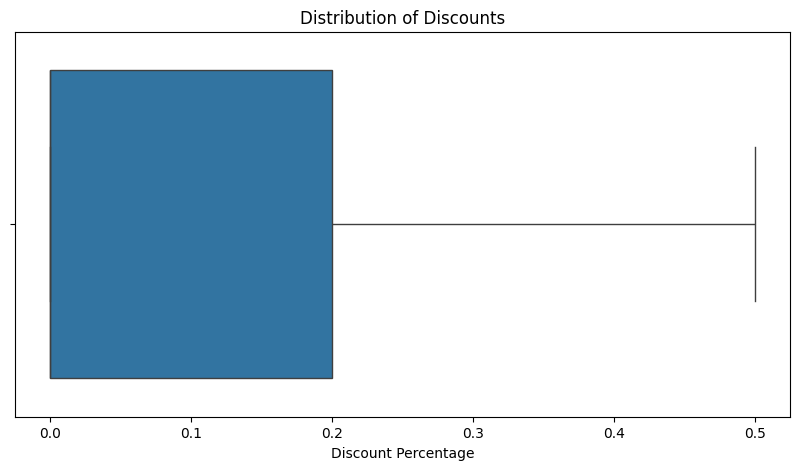

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Discount'])
plt.title("Distribution of Discounts")
plt.xlabel("Discount Percentage")
plt.show()

In [7]:
def filter_data(region=None, year=None, promotion_flag=None):
    filtered_df = data.copy()

    if region is not None:
        filtered_df = filtered_df[filtered_df['Region'] == region]

    if year is not None:
        filtered_df = filtered_df[filtered_df['Year'] == year]

    if promotion_flag is not None:
        filtered_df = filtered_df[filtered_df['PromotionFlag'] == promotion_flag]

    return filtered_df

def plot_sales_over_time(region=None, year=None, promotion_flag=None):
    filtered_df = filter_data(region, year, promotion_flag)

    filtered_df = filtered_df.sort_values(by='Order Date')

    sales_trend = filtered_df.groupby('Order Date')['Sales'].sum().reset_index()

    if sales_trend.empty:
        print("No data available for the selected filters!")
        return

    fig = px.line(sales_trend, x='Order Date', y='Sales', title='Sales Over Time')
    fig.update_xaxes(title_text='Order Date', tickformat='%Y-%m-%d')
    fig.update_yaxes(title_text='Sales')
    fig.show()

plot_sales_over_time()

In [8]:
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

def plot_profit_by_region():
    region_profit = data.groupby('Region')['Profit'].sum().reset_index()

    fig = px.choropleth(region_profit,
                        locations='Region',
                        locationmode='ISO-3',
                        color='Profit',
                        title='Total Profit by Region',
                        color_continuous_scale='Blues')

    fig.update_layout(geo=dict(showcoastlines=True))
    fig.show()

plot_profit_by_region()

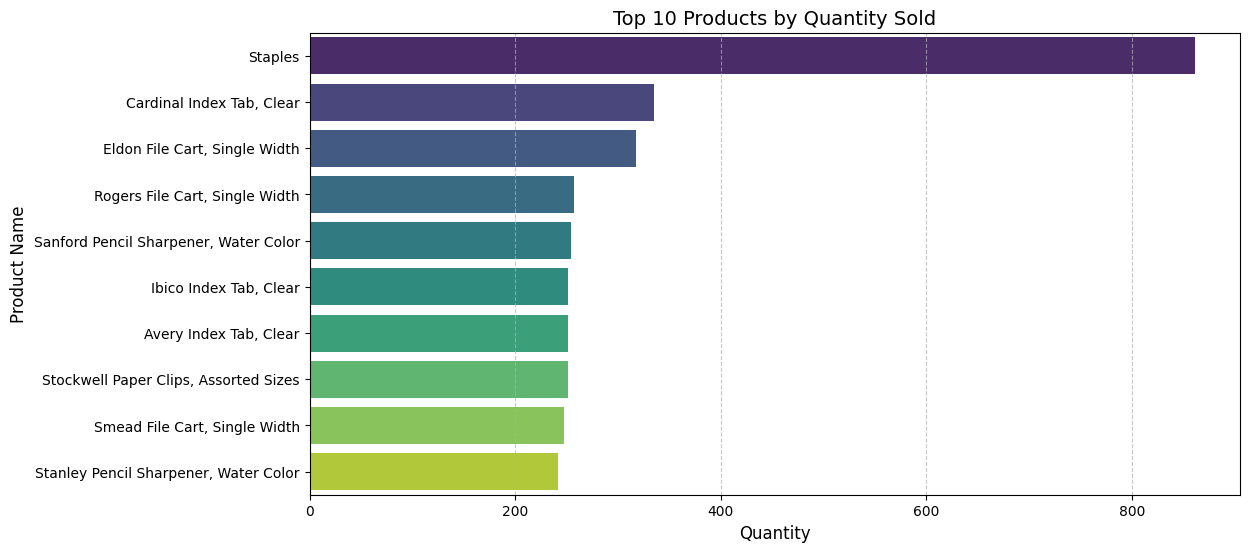

In [9]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

def plot_quantity_by_product(top_n=10):
    product_quantity = data.groupby('Product Name')['Quantity'].sum().reset_index()

    product_quantity = product_quantity.sort_values(by='Quantity', ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=product_quantity, x='Quantity', y='Product Name', palette='viridis')

    plt.title(f'Top {top_n} Products by Quantity Sold', fontsize=14)
    plt.xlabel('Quantity', fontsize=12)
    plt.ylabel('Product Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

plot_quantity_by_product(10)